(pulse-shapes)=
# Pulse shapes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget

In [2]:
span = 8  # Length of the pulse shape in symbols
sps = 10  # Samples per symbol

Create a rectangular pulse shape for reference.

In [3]:
rect = np.zeros(sps * span + 1)
rect[rect.size // 2 - sps // 2 : rect.size // 2 + sps // 2] = 1 / np.sqrt(sps)

## Raised cosine

Create three raised cosine pulses with different excess bandwidths.
This is achieved using the {func}`sdr.raised_cosine()` function.

In [4]:
rc_0p1 = sdr.raised_cosine(0.1, span, sps)
rc_0p5 = sdr.raised_cosine(0.5, span, sps)
rc_0p9 = sdr.raised_cosine(0.9, span, sps)

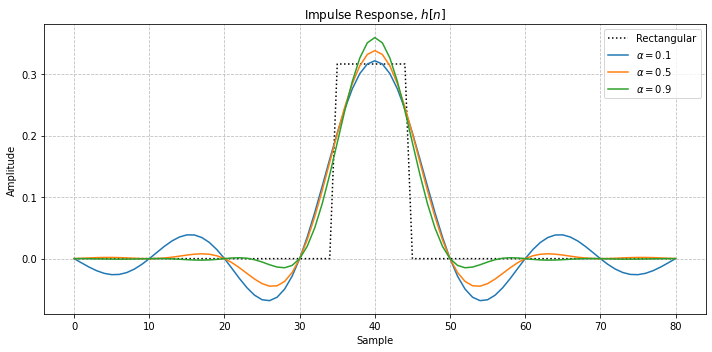

In [5]:
plt.figure(figsize=(10, 5))
sdr.plot.impulse_response(rect, color="k", linestyle=":", label="Rectangular")
sdr.plot.impulse_response(rc_0p1, label=r"$\alpha = 0.1$")
sdr.plot.impulse_response(rc_0p5, label=r"$\alpha = 0.5$")
sdr.plot.impulse_response(rc_0p9, label=r"$\alpha = 0.9$")
plt.show()

The raised cosine filter is a Nyquist filter. This means that the impulse response $h[n]$ is zero at adjacent symbols.
Specifically, $h[n] = 0$ for $n = \pm k\ T_s / T_{sym}$

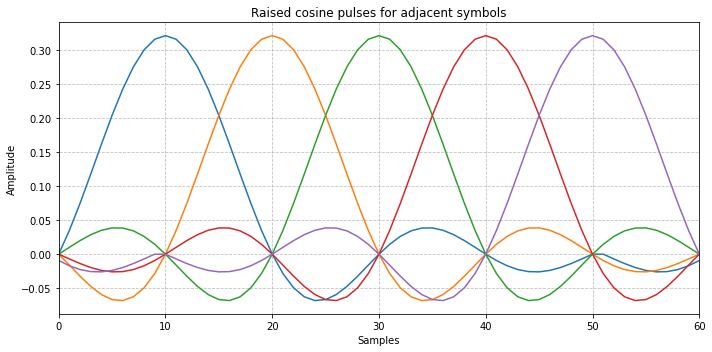

In [6]:
plt.figure(figsize=(10, 5))
sdr.plot.time_domain(np.roll(rc_0p1, -3 * sps))
sdr.plot.time_domain(np.roll(rc_0p1, -2 * sps))
sdr.plot.time_domain(np.roll(rc_0p1, -1 * sps))
sdr.plot.time_domain(np.roll(rc_0p1, 0 * sps))
sdr.plot.time_domain(np.roll(rc_0p1, 1 * sps))
plt.xlim(0, 60)
plt.title("Raised cosine pulses for adjacent symbols")
plt.tight_layout()
plt.show()

C:\Users\matth\repos\sdr\src\sdr\plot\_filter.py:365: RuntimeWarning: divide by zero encountered in log10
  H = 10 * np.log10(np.abs(H) ** 2)


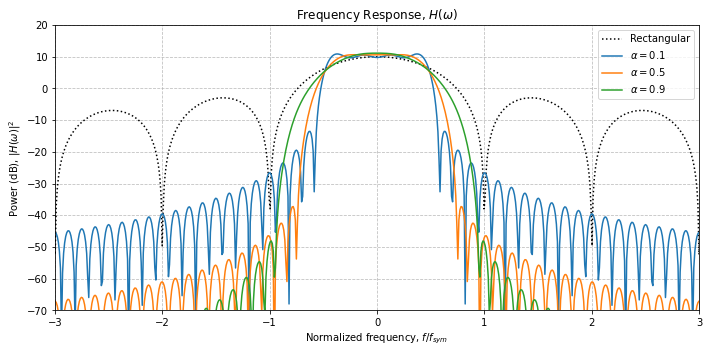

In [7]:
plt.figure(figsize=(10, 5))
sdr.plot.frequency_response(rect, sample_rate=sps, color="k", linestyle=":", label="Rectangular")
sdr.plot.frequency_response(rc_0p1, sample_rate=sps, label=r"$\alpha = 0.1$")
sdr.plot.frequency_response(rc_0p5, sample_rate=sps, label=r"$\alpha = 0.5$")
sdr.plot.frequency_response(rc_0p9, sample_rate=sps, label=r"$\alpha = 0.9$")
plt.xlim(-3, 3)
plt.ylim(-70, 20)
plt.xlabel("Normalized frequency, $f/f_{sym}$")
plt.show()

Notice the raised cosine pulse with excess bandwidth $\alpha = 0.1$ has a total bandwidth of nearly $f_{sym}$.
Compare this to $\alpha = 0.9$, which has a null-to-null bandwidth of nearly $2 f_{sym}$.

While small $\alpha$ produces a filter with smaller bandwidth, its side lobes are much higher.

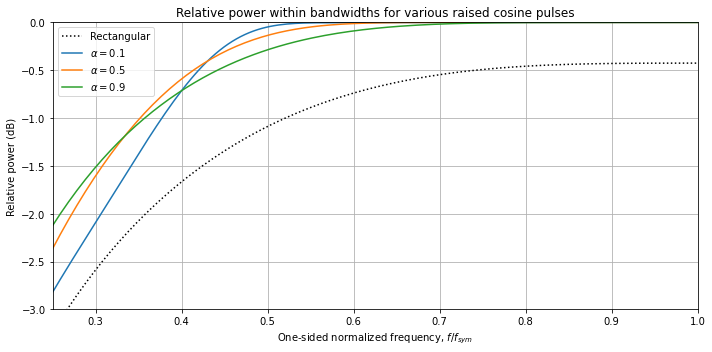

In [8]:
# Compute the one-sided power spectral density of the pulses
w, H_rect = scipy.signal.freqz(rect, 1, worN=1024, whole=False, fs=sps)
w, H_rc_0p1 = scipy.signal.freqz(rc_0p1, 1, worN=1024, whole=False, fs=sps)
w, H_rc_0p5 = scipy.signal.freqz(rc_0p5, 1, worN=1024, whole=False, fs=sps)
w, H_rc_0p9 = scipy.signal.freqz(rc_0p9, 1, worN=1024, whole=False, fs=sps)

# Compute the relative power in the main lobe of the pulses
P_rect = 10 * np.log10(np.cumsum(np.abs(H_rect) ** 2) / np.sum(np.abs(H_rect) ** 2))
P_rc_0p1 = 10 * np.log10(np.cumsum(np.abs(H_rc_0p1) ** 2) / np.sum(np.abs(H_rc_0p1) ** 2))
P_rc_0p5 = 10 * np.log10(np.cumsum(np.abs(H_rc_0p5) ** 2) / np.sum(np.abs(H_rc_0p5) ** 2))
P_rc_0p9 = 10 * np.log10(np.cumsum(np.abs(H_rc_0p9) ** 2) / np.sum(np.abs(H_rc_0p9) ** 2))

plt.figure(figsize=(10, 5))
plt.plot(w, P_rect, color="k", linestyle=":", label="Rectangular")
plt.plot(w, P_rc_0p1, label=r"$\alpha = 0.1$")
plt.plot(w, P_rc_0p5, label=r"$\alpha = 0.5$")
plt.plot(w, P_rc_0p9, label=r"$\alpha = 0.9$")
plt.legend()
plt.xlim(0.25, 1)
plt.ylim(-3, 0)
plt.grid()
plt.xlabel("One-sided normalized frequency, $f/f_{sym}$")
plt.ylabel("Relative power (dB)")
plt.title("Relative power within bandwidths for various raised cosine pulses")
plt.tight_layout()
plt.show()

## Square-root raised cosine

Create three square-root raised cosine pulses with different excess bandwidths.
This is achieved using the {func}`sdr.root_raised_cosine()` function.

In [9]:
srrc_0p1 = sdr.root_raised_cosine(0.1, span, sps)
srrc_0p5 = sdr.root_raised_cosine(0.5, span, sps)
srrc_0p9 = sdr.root_raised_cosine(0.9, span, sps)

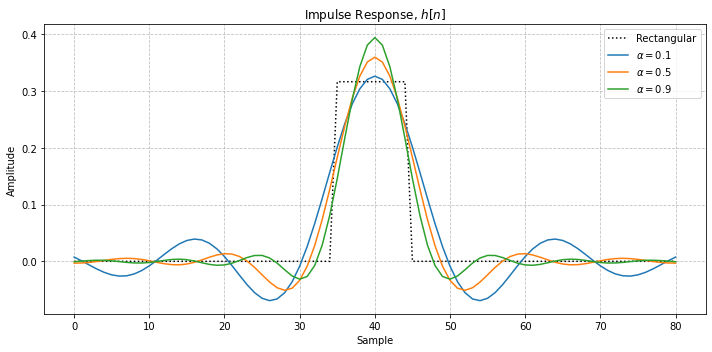

In [10]:
plt.figure(figsize=(10, 5))
sdr.plot.impulse_response(rect, color="k", linestyle=":", label="Rectangular")
sdr.plot.impulse_response(srrc_0p1, label=r"$\alpha = 0.1$")
sdr.plot.impulse_response(srrc_0p5, label=r"$\alpha = 0.5$")
sdr.plot.impulse_response(srrc_0p9, label=r"$\alpha = 0.9$")
plt.legend()
plt.show()

The square-root raised cosine filter is not a Nyquist filter.
Therefore, the impulse response $h[n]$ is not zero at adjacent symbols.

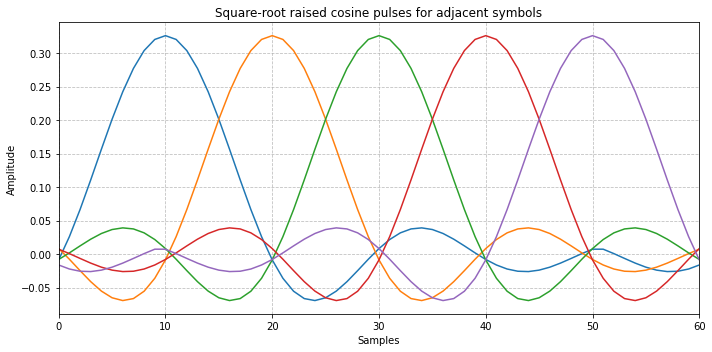

In [11]:
plt.figure(figsize=(10, 5))
sdr.plot.time_domain(np.roll(srrc_0p1, -3 * sps))
sdr.plot.time_domain(np.roll(srrc_0p1, -2 * sps))
sdr.plot.time_domain(np.roll(srrc_0p1, -1 * sps))
sdr.plot.time_domain(np.roll(srrc_0p1, 0 * sps))
sdr.plot.time_domain(np.roll(srrc_0p1, 1 * sps))
plt.xlim(0, 60)
plt.title("Square-root raised cosine pulses for adjacent symbols")
plt.tight_layout()
plt.show()

C:\Users\matth\repos\sdr\src\sdr\plot\_filter.py:365: RuntimeWarning: divide by zero encountered in log10
  H = 10 * np.log10(np.abs(H) ** 2)


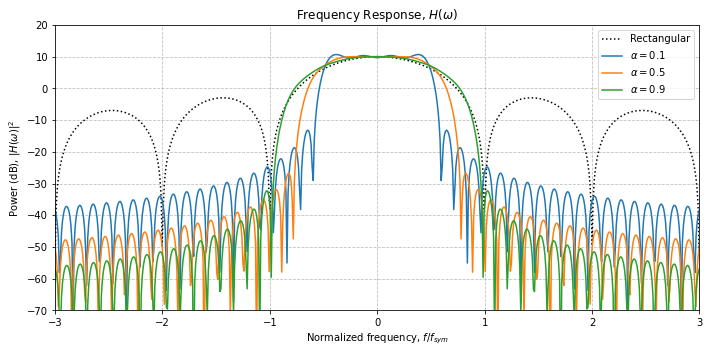

In [12]:
plt.figure(figsize=(10, 5))
sdr.plot.frequency_response(rect, sample_rate=sps, color="k", linestyle=":", label="Rectangular")
sdr.plot.frequency_response(srrc_0p1, sample_rate=sps, label=r"$\alpha = 0.1$")
sdr.plot.frequency_response(srrc_0p5, sample_rate=sps, label=r"$\alpha = 0.5$")
sdr.plot.frequency_response(srrc_0p9, sample_rate=sps, label=r"$\alpha = 0.9$")
plt.legend()
plt.xlim(-3, 3)
plt.ylim(-70, 20)
plt.xlabel("Normalized frequency, $f/f_{sym}$")
plt.show()

While the bandwidths of the square-root raised cosine filter are similar to the raised cosine filter,
the side lobes are significantly higher.
This is due to this filter not being a Nyquist filter.

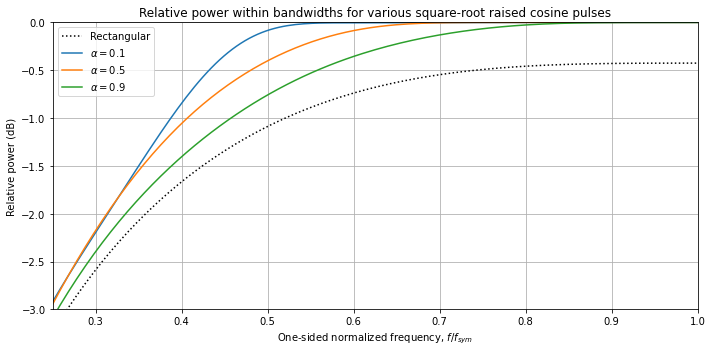

In [13]:
# Compute the one-sided power spectral density of the pulses
w, H_rect = scipy.signal.freqz(rect, 1, worN=1024, whole=False, fs=sps)
w, H_srrc_0p1 = scipy.signal.freqz(srrc_0p1, 1, worN=1024, whole=False, fs=sps)
w, H_srrc_0p5 = scipy.signal.freqz(srrc_0p5, 1, worN=1024, whole=False, fs=sps)
w, H_srrc_0p9 = scipy.signal.freqz(srrc_0p9, 1, worN=1024, whole=False, fs=sps)

# Compute the relative power in the main lobe of the pulses
P_rect = 10 * np.log10(np.cumsum(np.abs(H_rect) ** 2) / np.sum(np.abs(H_rect) ** 2))
P_srrc_0p1 = 10 * np.log10(np.cumsum(np.abs(H_srrc_0p1) ** 2) / np.sum(np.abs(H_srrc_0p1) ** 2))
P_srrc_0p5 = 10 * np.log10(np.cumsum(np.abs(H_srrc_0p5) ** 2) / np.sum(np.abs(H_srrc_0p5) ** 2))
P_srrc_0p9 = 10 * np.log10(np.cumsum(np.abs(H_srrc_0p9) ** 2) / np.sum(np.abs(H_srrc_0p9) ** 2))

plt.figure(figsize=(10, 5))
plt.plot(w, P_rect, color="k", linestyle=":", label="Rectangular")
plt.plot(w, P_srrc_0p1, label=r"$\alpha = 0.1$")
plt.plot(w, P_srrc_0p5, label=r"$\alpha = 0.5$")
plt.plot(w, P_srrc_0p9, label=r"$\alpha = 0.9$")
plt.legend()
plt.xlim(0.25, 1)
plt.ylim(-3, 0)
plt.grid()
plt.xlabel("One-sided normalized frequency, $f/f_{sym}$")
plt.ylabel("Relative power (dB)")
plt.title("Relative power within bandwidths for various square-root raised cosine pulses")
plt.tight_layout()
plt.show()

## Gaussian

Create three raised Gaussian pulses with different time-bandwidth products.
This is achieved using the {func}`sdr.gaussian()` function.

In [14]:
gauss_0p1 = sdr.gaussian(0.1, span, sps)
gauss_0p2 = sdr.gaussian(0.2, span, sps)
gauss_0p3 = sdr.gaussian(0.3, span, sps)

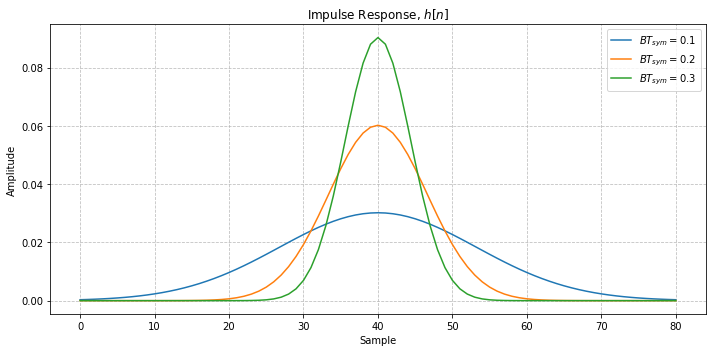

In [15]:
plt.figure(figsize=(10, 5))
sdr.plot.impulse_response(gauss_0p1, label=r"$B T_{sym} = 0.1$")
sdr.plot.impulse_response(gauss_0p2, label=r"$B T_{sym} = 0.2$")
sdr.plot.impulse_response(gauss_0p3, label=r"$B T_{sym} = 0.3$")
plt.show()

C:\Users\matth\repos\sdr\src\sdr\plot\_filter.py:365: RuntimeWarning: divide by zero encountered in log10
  H = 10 * np.log10(np.abs(H) ** 2)
C:\Users\matth\repos\sdr\src\sdr\plot\_filter.py:365: RuntimeWarning: divide by zero encountered in log10
  H = 10 * np.log10(np.abs(H) ** 2)


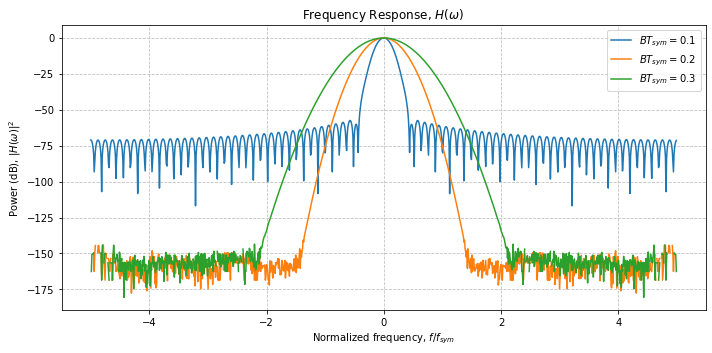

In [16]:
plt.figure(figsize=(10, 5))
sdr.plot.frequency_response(gauss_0p1, sample_rate=sps, label=r"$B T_{sym} = 0.1$")
sdr.plot.frequency_response(gauss_0p2, sample_rate=sps, label=r"$B T_{sym} = 0.2$")
sdr.plot.frequency_response(gauss_0p3, sample_rate=sps, label=r"$B T_{sym} = 0.3$")
plt.legend()
plt.xlabel("Normalized frequency, $f/f_{sym}$")
plt.show()